In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We start by reading the class.txt file with the full database with labels.
classes = pd.read_table("../data/lightcurves/transient_info.txt")

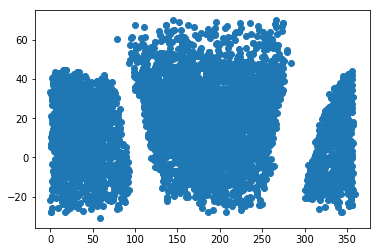

In [4]:
plt.scatter(classes['RA (J2000)'], classes['Dec (J2000)'])

In [5]:
# Select regions to query 
arcmin_in_deg = 1.0/60.0

dec_non_trans = np.array(classes['Dec (J2000)']) + 2.0*arcmin_in_deg
ra_non_trans = np.array(classes['RA (J2000)'])
radius_non_trans = np.ones(len(ra_non_trans))*1.2*arcmin_in_deg
non_trans_id = np.int_(np.ones(len(ra_non_trans))*1E6 + np.arange(len(ra_non_trans))+1.0)

np.savetxt('../data/NON_TRANS_QUERY/all_inputs_to_query.txt', 
           np.array([non_trans_id, ra_non_trans, dec_non_trans, radius_non_trans]).T, fmt="%d %f %f %f")

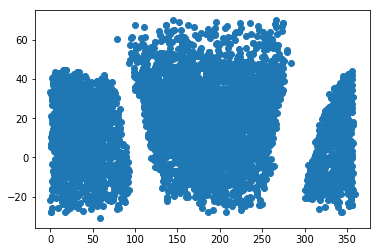

In [6]:
data = np.loadtxt('../data/NON_TRANS_QUERY/all_inputs_to_query.txt')
plt.scatter(data[:,1], data[:,2])

In [7]:
# after using a file to query here http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi, we read the results
data_base_ID = np.loadtxt("../data/CATALINA_PHOT/Database_ID_for_all_transients.dat")
query_result = pd.read_csv("../data/NON_TRANS_QUERY/result_web_subset_query_aa.csv")

In [9]:
#all IDs
id_all = np.array(list(set(query_result['ID'])))
print(len(id_all))
#IDs discarding blended sources
id_no_blend =  np.array(list(set(id_all) - set(query_result[query_result['Blend']==1]['ID'])))
print(len(id_no_blend))
#IDs discarding transient sources
id_no_blend_no_trans = np.array(list(set(id_no_blend)-set(data_base_ID)))
print(len(id_no_blend_no_trans))

273
221
221


[2108002020867 1021001011204 2104001015816 2108002020873 3017001021961
 3015001000973 1132001043981 1109001027599 1015001012751 1132001070608
 1107001053713 1132001025043 1109001000466 1109001027606 1121001008666
 1109001039391 2108002020896 1015001012769 2108002020389 1132001044520
 1132001070632 1132001024553 1132001070125 1109001027630 1109001038898
 2108002020915 2108002020918 1129001026616 1132001070137 1132001070141
 1109001027656 2104001015368 2108002020940 1015001012812 2110002003534
 2108002020431 3017001022033 2108002020946 2108002020436 2110002003541
 2110002003543 2110002003544 1121001008728 1015001012827 1126001035873
 2110002003554 3017001022049 1121001033316 3017001022057 1132001025136
 3015001001075 1107001057397 3017001022071 1129001027705 1132001024124
 1118001057920 2108002020481 2108002020483 1026001004164 1118001057928
 1109001000440 3015001001099 1015001012876 1109001038993 2108002021012
 1107001026710 2108002020502 1107001026713 3015001001115 1107001053851
 21080

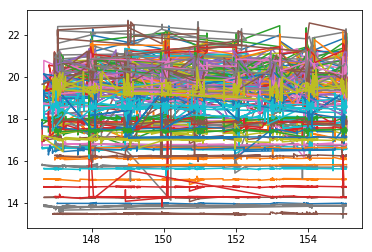

In [12]:
print(id_no_blend_no_trans)
for i in id_no_blend_no_trans:
    l = len((query_result[query_result['ID']==i]['MJD']))
    if l > 30:
        plt.plot(query_result[query_result['ID']==i]['MJD']/365.0, query_result[query_result['ID']==i]['Mag'])
        print(len((query_result[query_result['ID']==i]['MJD'])))

In [23]:
# We create a new column with the trasient class name
n_elements  = len(classes)
classification = []
for i in range(n_elements):
    classification.append(classes['Classification'][i].split()[0])
classes['class'] = classification
classes = classes.rename(columns={"CSS images":"transID"})
classes = classes.set_index("transID")
print(len(classes.index))
print(len(np.unique(classes.index)))
classes[:10]

# look for transID in orphan data
cuenta = open('cuenta_en_orph.sh', 'w')
for i in classes.index:
    cuenta.write("grep {} *.orph |wc -l\n".format(i))
cuenta.close()

5540
5539


In [108]:
# With the 'CSS_images' we have to link to the 'dbID' that is provided in the *.out 
# files. That's why we read them here:

In [24]:
out_files  = glob.glob("../data/CATALINA_PHOT/*.out")
print(out_files)

['../data/CATALINA_PHOT/input1.out', '../data/CATALINA_PHOT/input10.out', '../data/CATALINA_PHOT/input11.out', '../data/CATALINA_PHOT/input12.out', '../data/CATALINA_PHOT/input13.out', '../data/CATALINA_PHOT/input14.out', '../data/CATALINA_PHOT/input15.out', '../data/CATALINA_PHOT/input16.out', '../data/CATALINA_PHOT/input17.out', '../data/CATALINA_PHOT/input18.out', '../data/CATALINA_PHOT/input19.out', '../data/CATALINA_PHOT/input2.out', '../data/CATALINA_PHOT/input20.out', '../data/CATALINA_PHOT/input21.out', '../data/CATALINA_PHOT/input22.out', '../data/CATALINA_PHOT/input23.out', '../data/CATALINA_PHOT/input24.out', '../data/CATALINA_PHOT/input25.out', '../data/CATALINA_PHOT/input26.out', '../data/CATALINA_PHOT/input27.out', '../data/CATALINA_PHOT/input28.out', '../data/CATALINA_PHOT/input3.out', '../data/CATALINA_PHOT/input4.out', '../data/CATALINA_PHOT/input5.out', '../data/CATALINA_PHOT/input6.out', '../data/CATALINA_PHOT/input7.out', '../data/CATALINA_PHOT/input8.out', '../data

In [25]:
out_data = pd.read_table(out_files[0], sep=' ',header=None, names=['transID', 'dbID', 'mag_out', 'ra_out', 'dec_out'])
for i in range(1,len(out_files)):
    tmp_data = pd.read_table(out_files[i], sep=' ',header=None, names=['transID', 'dbID', 'mag_out', 'ra_out', 'dec_out'])
    out_data = pd.concat([out_data, tmp_data])
out_data = out_data.set_index("transID")
#print(len(out_data))
print(len(out_data.index))
print('unicos', len(np.unique(out_data['dbID'])))
out_data[:10]

# look for dbID in phot data
cuenta = open('cuenta_en_phot.sh', 'w')
for i in out_data['dbID']:
    cuenta.write("grep {} *.phot |wc -l\n".format(i))
cuenta.close()
#out_data['transID']

4280
unicos 4046


In [ ]:
# look for the link 'CSS images'->'dbID'
n_elements  = len(classes)
dbID = []
for i in range(n_elements):
    classification.append(classes['Classification'][i].split()[0])
classes['class'] = classification

In [26]:
idtrans_orph = np.loadtxt('../data/CATALINA_PHOT/ID_trans_para_cuenta_en_orph', dtype=int)
n_orph = np.loadtxt('../data/CATALINA_PHOT/conteo_orph', dtype=int)
print(len(idtrans_orph))
iddb_phot = np.loadtxt('../data/CATALINA_PHOT/ID_DB_para_cuenta_en_phot', dtype=int)
n_phot = np.loadtxt('../data/CATALINA_PHOT/conteo_phot', dtype=int)
print(len(n_phot))
idtrans_orph[0:10]

5540
4280


array([1208280210014111715, 1009101320014148188, 1011271040014129121,
       1607091210014124380, 1109261070014122864, 1511091090014127873,
       1111020260014102295, 1111300260014103252, 1511191320014127170,
       1110061260014124074])

In [32]:
curvas_existentes = 0
curvas_inexistentes = 0
n_esperadas = len(idtrans_orph)
print(n_esperadas)
pp=0
for i in range(n_esperadas): # busco en todas los indices de las transientes de entrada
    #print('ENTRA', idtrans_orph[i])
    if idtrans_orph[i] in out_data.index: # miro si este indice de transiente tiene un IDdb asociado
        iddb  = np.int_(out_data.loc[idtrans_orph[i]]['dbID'])
        if np.isscalar(iddb): # pude que un valor de idtrans sea uno solo en iddb
            #print('\t dbID', iddb)
            ii = np.where(iddb==iddb_phot)[0]
            if n_phot[ii][0] > 0: # busco este IDdb in phot
                #print('\t NOT ORPHAN {}'.format(n_phot[ii][0]))
                curvas_existentes +=1
            else:
                curvas_inexistentes +=1
        else: # pero tambien puede ser que un valor de idtrans sea varios in iddb.

            n_in_phot = n_phot[np.in1d(iddb_phot, iddb)]
            if n_in_phot[0]==n_in_phot[1]:
                print(idtrans_orph[i], iddb, n_in_phot)
                pp+=1
            if np.all(n_in_phot==0): # busco este IDdb in phot
                curvas_inexistentes +=1
            else:
                curvas_existentes +=1
 
        #ii = ==iddb_phot
    elif n_orph[i]>0: # si no esta en phot miro si esta en orph
        #print('\t ORPHAN {}'.format(n_orph[i]))
        curvas_existentes +=1
    else:
        curvas_inexistentes +=1
print(curvas_existentes, curvas_inexistentes, curvas_existentes+curvas_inexistentes)
print(pp)

5540
1310120180014101233 [3019002005376 3019002005376] [51 51]
1310120180014101233 [3019002005376 3019002005376] [51 51]
712181350024142260 [1135003067050 1135003067050] [0 0]
1211131260074105573 [1126007006403 1126007006403] [128 128]
909161010074118793 [2101018003222 2101019003389 2101018003222 2101019003389] [0 0 0 0]
1610131180104104884 [1118010008073 2116026021020] [0 0]
1301151120114110654 [2112028003650 2111028020892 2112028003650 2111028020892] [0 0 0 0]
909170150134129127 [3015017012808 3015018012933 1015013037407 3015017012808 3015018012933] [  0   0 184   0   0]
1312241210134128201 [2121033017540 2121034014137 2121033017540 2121034014137] [0 0 0 0]
1209190090144112412 [3011019014679 3011020016200 1009014012279 3011019014679 3011020016200
 3011019014679 3011020016200] [  0   0 246   0   0   0   0]
1511090150184104648 [1015018006207 3015026022960 3015026022960] [0 0 0]
909281150204138107 [2116051004986 2116052005563 2116051004986 2116052005563] [0 0 0 0]
910230180214124000 [10

In [202]:
out_data

,dbID,mag_out,ra_out,dec_out
transID,,,,
1208280210014111715,1021001010444,17.415,0.04331,-21.92086
1009101320014148188,1132001069055,19.742,0.10307,33.42835
1011271040014129121,1104001042684,19.813,0.37714,5.10631
1011271040014129121,2104001014968,18.058,0.37694,5.10679
1607091210014124380,1121001032550,18.444,0.38483,21.22677
1110061260014124074,1126001035357,18.620,1.33744,26.82108
1206191210014107066,1121001005907,21.599,1.39179,20.02357
1609221070014133607,2108002020064,20.968,1.47321,8.43018
1006021180014134943,1118001057162,20.985,1.74870,19.47162
